# Additional Readings
You can read the full description of project here:
https://medium.com/@Markeko/speech-emotion-recognition-with-convolutional-neural-network-ae5406a1c0f7

# Import libraries

In [1]:
#Import data packages
import os
import sys
import glob
import numpy as np
import pandas as pd

#Import audio packages
import librosa
import librosa.display
from scipy.io import wavfile
import scipy.io.wavfile
import sys

#Import plotting packages
import matplotlib.pyplot as plt
from matplotlib.pyplot import specgram
import matplotlib.pyplot as plt
import seaborn as sns

#Import Keras & Tensorflow packages
import keras
import tensorflow as tf
from keras import regularizers
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Embedding
from keras.layers import LSTM
from tensorflow.keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical
from keras.layers import Input, Flatten, Dropout, Activation
from keras.layers import Conv1D, MaxPooling1D, AveragePooling1D
from keras.models import Model
from keras.callbacks import ModelCheckpoint
from sklearn.metrics import confusion_matrix

# Read Files

There are two databases that were used for this project:
- RAVDESS: The RAVDESS file contains a unique filename that consists in a 7-part numerical identifier.
- TESS: The TESS file contains a unique letter at beginning of file name to identify the emotion.

## Read RAVDESS Dataset

In [2]:
#Build list of files
rawdata_list = os.listdir('RawData/')

In [3]:
#Review list of files
print(rawdata_list)

['03-01-01-01-01-01-01.wav', '03-01-01-01-01-01-02.wav', '03-01-01-01-01-01-03.wav', '03-01-01-01-01-01-04.wav', '03-01-01-01-01-01-05.wav', '03-01-01-01-01-01-06.wav', '03-01-01-01-01-01-07.wav', '03-01-01-01-01-01-08.wav', '03-01-01-01-01-01-09.wav', '03-01-01-01-01-01-10.wav', '03-01-01-01-01-01-11.wav', '03-01-01-01-01-01-12.wav', '03-01-01-01-01-01-13.wav', '03-01-01-01-01-01-14.wav', '03-01-01-01-01-01-15.wav', '03-01-01-01-01-01-16.wav', '03-01-01-01-01-01-17.wav', '03-01-01-01-01-01-18.wav', '03-01-01-01-01-01-19.wav', '03-01-01-01-01-01-20.wav', '03-01-01-01-01-01-21.wav', '03-01-01-01-01-01-22.wav', '03-01-01-01-01-01-23.wav', '03-01-01-01-01-01-24.wav', '03-01-01-01-01-02-01.wav', '03-01-01-01-01-02-02.wav', '03-01-01-01-01-02-03.wav', '03-01-01-01-01-02-04.wav', '03-01-01-01-01-02-05.wav', '03-01-01-01-01-02-06.wav', '03-01-01-01-01-02-07.wav', '03-01-01-01-01-02-08.wav', '03-01-01-01-01-02-09.wav', '03-01-01-01-01-02-10.wav', '03-01-01-01-01-02-11.wav', '03-01-01-01-01-02-

## LIbrosa & MFCC configuration
In order to analyze and standardize how each audio file feature was built, the following configurations were determined:

In [4]:
#sample feature
#librosa.core.load(path, sr=22050, mono=True, offset=0.0, duration=None, dtype=<class 'numpy.float32'>, res_type='kaiser_best')
res_type_s = 'kaiser_best'
duration_s = None
sample_rate_s = 22050
offset_s = 0.5

#Mfcc
#librosa.feature.mfcc(y=None, sr=22050, S=None, n_mfcc=20, dct_type=2, norm='ortho', lifter=0, **kwargs)
mfcc_sample_rate = 22050
n_mfcc = 40
axis_mfcc = 1

### RAVDESS get emotion features

File naming convention

Each of the 7356 RAVDESS files has a unique filename. The filename consists of a 7-part numerical identifier (e.g., 02-01-06-01-02-01-12.mp4). These identifiers define the stimulus characteristics: 

Filename identifiers 

- Modality (01 = full-AV, 02 = video-only, 03 = audio-only).
- Vocal channel (01 = speech, 02 = song).
- Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fearful, 07 = disgust, 08 = surprised).
- Emotional intensity (01 = normal, 02 = strong). NOTE: There is no strong intensity for the 'neutral' emotion.
- Statement (01 = "Kids are talking by the door", 02 = "Dogs are sitting by the door").
- Repetition (01 = 1st repetition, 02 = 2nd repetition).
- Actor (01 to 24. Odd numbered actors are male, even numbered actors are female).

Filename example: 02-01-06-01-02-01-12.mp4 
- Video-only (02)
- Speech (01)
- Fearful (06)
- Normal intensity (01)
- Statement "dogs" (02)
- 1st Repetition (01)
- 12th Actor (12)
- Female, as the actor ID number is even.

In [5]:
#Build list with target variables for each file
feeling_list=[]

#Emotion (01 = neutral, 02 = calm, 03 = happy, 04 = sad, 05 = angry, 06 = fear, 07 = disgust, 08 = surprised) 

for emotion_path in rawdata_list:
    if emotion_path.split('-')[2] == '01':
        feeling_list.append("neutral")
    elif emotion_path.split('-')[2] == '02':
        feeling_list.append("calm")
    elif emotion_path.split('-')[2] == '03':
        feeling_list.append("happy")
    elif emotion_path.split('-')[2] == '04':
        feeling_list.append("sad")
    elif emotion_path.split('-')[2] == '05':
        feeling_list.append("angry")
    elif emotion_path.split('-')[2] == '06':
        feeling_list.append("fear")
    elif emotion_path.split('-')[2] == '07':
        feeling_list.append("disgust")
    elif emotion_path.split('-')[2] == '08':
        feeling_list.append("surprised")
    else:
        feeling_list.append("unknown")

In [6]:
#Check list
feeling_list

['neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'neutral',
 'ne

In [7]:
#Turn list into dataframe
labels = pd.DataFrame(feeling_list)

In [8]:
#Check shape
labels.shape

(1440, 1)

In [9]:
#Change index name to "emotion"
labels = labels.rename({0: 'emotion'}, axis=1)

In [10]:
labels.shape

(1440, 1)

In [11]:
#Count the number of files per emotion
labels_total = pd.DataFrame(labels.groupby(['emotion']).size())
labels_total

,0
emotion,
angry,192
calm,192
disgust,192
fear,192
happy,192
neutral,96
sad,192
surprised,192


### RAVDESS get audio features with librosa library

In [12]:

rawdata_ravdess = pd.DataFrame(columns=['feature'])
bookmark=0

for y in rawdata_list:
    #Change to kaiser_best & 22050 kHz
    #sr > target sampling rate
    #offset=0.5
    X, sample_rate = librosa.load('RawData/'+y, 
                                  res_type = res_type_s,
                                  duration = duration_s,
                                  sr = sample_rate_s,
                                  offset = offset_s)
    sample_rate = np.array(sample_rate)
    
    #Get MFCCs from each file
    mfccs = librosa.feature.mfcc(   y=X, 
                                    sr = mfcc_sample_rate, 
                                    n_mfcc = n_mfcc)
    
    #Calculate mean of MFCCs
    mfccs_mean = np.mean(    mfccs, 
                             axis = axis_mfcc)
    feature = mfccs_mean
    
    #Add MFCCs feature results to list
    rawdata_ravdess.loc[bookmark] = [feature]
    bookmark=bookmark+1   

In [13]:
#Verify data results
rawdata_ravdess.shape

(1440, 1)

In [14]:
#Verify that there are no null values
rawdata_ravdess.isnull().values.any()

False

In [15]:
# See array sample of features
rawdata_ravdess

,feature
0,"[-671.3947, 66.76209, -0.8031736, 16.397806, 7..."
1,"[-624.36914, 64.56482, -12.068572, 11.360991, ..."
2,"[-586.3834, 67.529655, -4.9390116, 13.85341, 3..."
3,"[-664.51685, 52.24366, -10.568827, 12.448711, ..."
4,"[-689.68176, 79.54792, 6.3848214, 17.58376, 10..."
...,...
1435,"[-562.17584, 40.83896, -22.902687, 7.2095323, ..."
1436,"[-488.2176, 54.026115, -5.6680098, 14.405636, ..."
1437,"[-509.09995, 31.333313, -18.702072, -3.8738506..."
1438,"[-499.69315, 41.940163, -15.661548, -0.1003641..."


In [16]:
#Turn array into dataframe
rawdata_ravdess_final = pd.DataFrame(rawdata_ravdess['feature'].values.tolist())

In [17]:
#Analyze new dataframe shape
rawdata_ravdess_final.shape

(1440, 40)

In [18]:
# Check data sample
rawdata_ravdess_final.head()

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-671.394714,66.762093,-0.803174,16.397806,7.514786,2.309502,-5.473440,-1.983500,-14.529568,-1.763067,...,-2.734973,-2.177600,-3.423326,-1.972813,-3.967898,-1.697054,-1.329119,-2.123123,-4.130067,-1.843433
1,-624.369141,64.564819,-12.068572,11.360991,-6.662220,-2.700722,-7.720459,-8.432280,-6.146567,0.402561,...,-0.008967,3.946117,2.053208,5.126789,2.357050,3.340448,-1.931583,1.640402,-0.995546,0.893389
2,-586.383423,67.529655,-4.939012,13.853410,3.375603,-1.342491,-15.607982,-6.360179,-5.104679,-8.572944,...,-2.091636,-1.549652,-1.892016,1.164338,-0.055426,-1.253459,-3.225636,-2.361140,-1.318202,2.959448
3,-664.516846,52.243660,-10.568827,12.448711,-6.724777,-4.079839,-9.436715,-13.167788,-10.333027,-2.645067,...,-1.477941,1.114804,-2.729333,2.110939,2.055382,3.083011,1.030954,1.056760,4.401068,5.721843
4,-689.681763,79.547920,6.384821,17.583759,10.556285,0.527172,-1.631915,-2.790388,-2.794857,2.297231,...,-0.924785,0.894624,-0.286552,0.833501,-0.318295,2.581150,-0.990544,-1.715069,-2.530386,0.056745


## Ravdess join features and target

In [19]:
#Join labels with features
newdf_ravdess = pd.concat([rawdata_ravdess_final,labels], axis=1)

In [20]:
#Rename dataframe
newdf_ravdess = newdf_ravdess.rename(index=str, columns={"0": "label"})

In [21]:
#Analyze dataframe shape
newdf_ravdess.shape

(1440, 41)

In [22]:
#Anayze dataframe sample
newdf_ravdess.head()

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-671.394714,66.762093,-0.803174,16.397806,7.514786,2.309502,-5.473440,-1.983500,-14.529568,-1.763067,...,-2.177600,-3.423326,-1.972813,-3.967898,-1.697054,-1.329119,-2.123123,-4.130067,-1.843433,neutral
1,-624.369141,64.564819,-12.068572,11.360991,-6.662220,-2.700722,-7.720459,-8.432280,-6.146567,0.402561,...,3.946117,2.053208,5.126789,2.357050,3.340448,-1.931583,1.640402,-0.995546,0.893389,neutral
2,-586.383423,67.529655,-4.939012,13.853410,3.375603,-1.342491,-15.607982,-6.360179,-5.104679,-8.572944,...,-1.549652,-1.892016,1.164338,-0.055426,-1.253459,-3.225636,-2.361140,-1.318202,2.959448,neutral
3,-664.516846,52.243660,-10.568827,12.448711,-6.724777,-4.079839,-9.436715,-13.167788,-10.333027,-2.645067,...,1.114804,-2.729333,2.110939,2.055382,3.083011,1.030954,1.056760,4.401068,5.721843,neutral
4,-689.681763,79.547920,6.384821,17.583759,10.556285,0.527172,-1.631915,-2.790388,-2.794857,2.297231,...,0.894624,-0.286552,0.833501,-0.318295,2.581150,-0.990544,-1.715069,-2.530386,0.056745,neutral


In [23]:
#Datafram drop Nan values
newdf_ravdess.dropna(inplace=True)

In [24]:
from sklearn.utils import shuffle

#Shuffle dataframe
newdf_ravdess = shuffle(newdf_ravdess)
newdf_ravdess.head(10)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
968,-578.148315,81.935471,-1.322438,24.972155,17.709843,-6.178217,-9.608680,4.338515,-9.681654,-3.582347,...,2.471755,-1.576239,-1.391416,-1.129304,1.149266,-1.221161,-2.075429,-0.986001,-0.899412,fear
205,-759.868713,48.831192,6.293743,9.877087,-7.726900,-3.211107,-7.654166,-6.474563,-5.714338,-0.599513,...,0.563357,-1.941176,2.026637,0.522051,3.253979,2.889653,3.262951,2.267332,4.028258,calm
1421,-552.198975,43.284260,-27.281826,-8.029431,-7.709996,-17.848480,-15.826719,-18.644682,-10.804544,3.492190,...,7.577572,3.627385,5.211232,0.173141,2.811623,-1.008395,0.937442,0.073713,2.667025,surprised
785,-373.255646,5.505465,-38.067749,-3.612329,-19.442133,-9.448939,-9.091408,-3.662153,-14.989532,-4.590620,...,-0.606208,-2.416136,1.174615,-1.904315,0.372025,-2.046658,1.337847,-1.159528,1.506797,angry
1148,-520.217957,60.712593,-10.034712,18.207758,8.741771,-11.357503,-3.654096,-4.106589,-15.502877,2.552656,...,-1.660338,-4.637337,-1.517865,-2.396760,-0.913968,-3.603951,-1.178884,-3.848302,-1.941260,disgust
1112,-726.960632,81.982269,5.080208,29.945181,10.724860,5.901252,-3.276603,-1.577038,-5.520206,-1.015834,...,0.530441,-2.681469,0.510915,-1.531342,0.406787,-2.014485,-1.215467,-3.251617,-0.190443,disgust
935,-501.160767,28.844000,-14.634949,-0.503761,-15.901062,-9.516947,-18.690704,-8.896621,-11.585910,-1.631643,...,-2.062682,-3.086631,1.065555,-2.256798,-1.069466,-1.452362,-0.953909,-2.562482,0.207493,fear
1051,-328.933899,11.813381,-27.425049,-12.452916,-18.128977,-14.575312,-11.993761,-13.459925,-7.738886,6.996163,...,1.520248,0.076388,-0.271711,0.211126,0.816078,0.005361,1.903866,-0.099744,1.008085,fear
1222,-543.670105,53.447758,-1.386662,8.297358,1.571302,2.595718,-9.599534,-5.443903,-14.340852,-5.666345,...,1.450328,-1.390394,0.087281,-2.406899,0.269928,-1.348459,1.526008,0.424783,1.761872,disgust
104,-732.722900,82.892357,14.472756,23.440250,15.276708,8.387594,-5.726806,-1.628951,0.774579,3.450255,...,-0.348459,-2.756721,-0.190046,-1.272706,-0.301792,-3.353452,-1.371529,-4.220243,-0.987353,calm


In [25]:
#Verify that there are no null values
newdf_ravdess.isnull().values.any()

False

In [26]:
# Check dataframe sample
newdf_ravdess.head(5)

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
968,-578.148315,81.935471,-1.322438,24.972155,17.709843,-6.178217,-9.608680,4.338515,-9.681654,-3.582347,...,2.471755,-1.576239,-1.391416,-1.129304,1.149266,-1.221161,-2.075429,-0.986001,-0.899412,fear
205,-759.868713,48.831192,6.293743,9.877087,-7.726900,-3.211107,-7.654166,-6.474563,-5.714338,-0.599513,...,0.563357,-1.941176,2.026637,0.522051,3.253979,2.889653,3.262951,2.267332,4.028258,calm
1421,-552.198975,43.284260,-27.281826,-8.029431,-7.709996,-17.848480,-15.826719,-18.644682,-10.804544,3.492190,...,7.577572,3.627385,5.211232,0.173141,2.811623,-1.008395,0.937442,0.073713,2.667025,surprised
785,-373.255646,5.505465,-38.067749,-3.612329,-19.442133,-9.448939,-9.091408,-3.662153,-14.989532,-4.590620,...,-0.606208,-2.416136,1.174615,-1.904315,0.372025,-2.046658,1.337847,-1.159528,1.506797,angry
1148,-520.217957,60.712593,-10.034712,18.207758,8.741771,-11.357503,-3.654096,-4.106589,-15.502877,2.552656,...,-1.660338,-4.637337,-1.517865,-2.396760,-0.913968,-3.603951,-1.178884,-3.848302,-1.941260,disgust


In [27]:
#Analyz shape of dataframe
newdf_ravdess.shape

(1440, 41)

In [28]:
# see number of emotions
newdf_ravdess[newdf_ravdess.columns[-1]].nunique()

8

# Join RAVDESS + TESS dataframes

In [29]:
newdf_ravdess.columns

Index([        0,         1,         2,         3,         4,         5,
               6,         7,         8,         9,        10,        11,
              12,        13,        14,        15,        16,        17,
              18,        19,        20,        21,        22,        23,
              24,        25,        26,        27,        28,        29,
              30,        31,        32,        33,        34,        35,
              36,        37,        38,        39, 'emotion'],
      dtype='object')

In [30]:
frames = [newdf_ravdess]

final_dataframe = pd.concat(frames, ignore_index=True)

In [31]:
#Check new and final dataframe
final_dataframe

,0,1,2,3,4,5,6,7,8,9,...,31,32,33,34,35,36,37,38,39,emotion
0,-578.148315,81.935471,-1.322438,24.972155,17.709843,-6.178217,-9.608680,4.338515,-9.681654,-3.582347,...,2.471755,-1.576239,-1.391416,-1.129304,1.149266,-1.221161,-2.075429,-0.986001,-0.899412,fear
1,-759.868713,48.831192,6.293743,9.877087,-7.726900,-3.211107,-7.654166,-6.474563,-5.714338,-0.599513,...,0.563357,-1.941176,2.026637,0.522051,3.253979,2.889653,3.262951,2.267332,4.028258,calm
2,-552.198975,43.284260,-27.281826,-8.029431,-7.709996,-17.848480,-15.826719,-18.644682,-10.804544,3.492190,...,7.577572,3.627385,5.211232,0.173141,2.811623,-1.008395,0.937442,0.073713,2.667025,surprised
3,-373.255646,5.505465,-38.067749,-3.612329,-19.442133,-9.448939,-9.091408,-3.662153,-14.989532,-4.590620,...,-0.606208,-2.416136,1.174615,-1.904315,0.372025,-2.046658,1.337847,-1.159528,1.506797,angry
4,-520.217957,60.712593,-10.034712,18.207758,8.741771,-11.357503,-3.654096,-4.106589,-15.502877,2.552656,...,-1.660338,-4.637337,-1.517865,-2.396760,-0.913968,-3.603951,-1.178884,-3.848302,-1.941260,disgust
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-678.724548,53.325912,2.097225,9.438822,1.973902,0.218721,-11.358478,-5.456435,-11.564639,0.102085,...,0.879327,-3.424842,2.992572,2.609702,6.213810,4.244335,5.472557,-0.301352,4.045341,calm
1436,-692.197083,89.341347,11.891230,22.626886,6.822555,9.144790,1.582874,-2.292605,-8.301694,2.029025,...,-0.068596,-1.513058,2.360297,-1.915757,2.145839,-1.760338,-2.355844,-3.109940,-0.792448,neutral
1437,-481.563843,30.091593,-11.034933,6.240816,-9.689867,-4.737847,-7.228804,-12.284654,-10.896464,-3.373559,...,0.723150,-1.839902,-0.848945,-1.688288,0.121935,-0.986496,0.849369,0.241972,1.011506,disgust
1438,-586.544373,44.593201,-17.341076,3.390730,-11.781609,-9.979109,-9.650828,-15.045975,-11.743676,-3.661286,...,1.730893,1.342177,2.593563,-0.371248,-0.008548,-1.022951,0.501255,0.462534,0.972330,surprised


In [32]:
#Move dataframe into separate file
final_dataframe.to_csv('emotion_capstone_final_dataframe_diego_rios.csv')

# Dividing the data into test and train

In [33]:
#Split features from targets
X = final_dataframe.iloc[:,:-1]

#Split targets
y = final_dataframe.iloc[:,-1]

In [34]:
#Get sample of target
y

0            fear
1            calm
2       surprised
3           angry
4         disgust
          ...    
1435         calm
1436      neutral
1437      disgust
1438    surprised
1439        angry
Name: emotion, Length: 1440, dtype: object

In [35]:
#Get sample of features
X

,0,1,2,3,4,5,6,7,8,9,...,30,31,32,33,34,35,36,37,38,39
0,-578.148315,81.935471,-1.322438,24.972155,17.709843,-6.178217,-9.608680,4.338515,-9.681654,-3.582347,...,-1.643488,2.471755,-1.576239,-1.391416,-1.129304,1.149266,-1.221161,-2.075429,-0.986001,-0.899412
1,-759.868713,48.831192,6.293743,9.877087,-7.726900,-3.211107,-7.654166,-6.474563,-5.714338,-0.599513,...,-2.901821,0.563357,-1.941176,2.026637,0.522051,3.253979,2.889653,3.262951,2.267332,4.028258
2,-552.198975,43.284260,-27.281826,-8.029431,-7.709996,-17.848480,-15.826719,-18.644682,-10.804544,3.492190,...,-0.138222,7.577572,3.627385,5.211232,0.173141,2.811623,-1.008395,0.937442,0.073713,2.667025
3,-373.255646,5.505465,-38.067749,-3.612329,-19.442133,-9.448939,-9.091408,-3.662153,-14.989532,-4.590620,...,-2.809328,-0.606208,-2.416136,1.174615,-1.904315,0.372025,-2.046658,1.337847,-1.159528,1.506797
4,-520.217957,60.712593,-10.034712,18.207758,8.741771,-11.357503,-3.654096,-4.106589,-15.502877,2.552656,...,-3.681195,-1.660338,-4.637337,-1.517865,-2.396760,-0.913968,-3.603951,-1.178884,-3.848302,-1.941260
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,-678.724548,53.325912,2.097225,9.438822,1.973902,0.218721,-11.358478,-5.456435,-11.564639,0.102085,...,-0.822434,0.879327,-3.424842,2.992572,2.609702,6.213810,4.244335,5.472557,-0.301352,4.045341
1436,-692.197083,89.341347,11.891230,22.626886,6.822555,9.144790,1.582874,-2.292605,-8.301694,2.029025,...,1.987399,-0.068596,-1.513058,2.360297,-1.915757,2.145839,-1.760338,-2.355844,-3.109940,-0.792448
1437,-481.563843,30.091593,-11.034933,6.240816,-9.689867,-4.737847,-7.228804,-12.284654,-10.896464,-3.373559,...,-1.807002,0.723150,-1.839902,-0.848945,-1.688288,0.121935,-0.986496,0.849369,0.241972,1.011506
1438,-586.544373,44.593201,-17.341076,3.390730,-11.781609,-9.979109,-9.650828,-15.045975,-11.743676,-3.661286,...,-2.815903,1.730893,1.342177,2.593563,-0.371248,-0.008548,-1.022951,0.501255,0.462534,0.972330


In [36]:
from sklearn.model_selection import train_test_split

#Split train & test dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, 
                                                    random_state=1)

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (1152, 40)
y_train shape: (1152,)
X_test shape: (288, 40)
y_test shape: (288,)


In [37]:
#Check unique values for y_test
y_test.unique()

array(['sad', 'angry', 'happy', 'fear', 'calm', 'disgust', 'surprised',
       'neutral'], dtype=object)

In [38]:
#Check unique values for y_train
y_train.unique()

array(['disgust', 'fear', 'sad', 'angry', 'happy', 'neutral', 'calm',
       'surprised'], dtype=object)

In [40]:
#Label Encoding
from keras.utils import np_utils
from sklearn.preprocessing import LabelEncoder

lb = LabelEncoder()

#Encode emotion labels into numbers
y_train_lb = np_utils.to_categorical(lb.fit_transform(y_train))
y_test_lb = np_utils.to_categorical(lb.fit_transform(y_test))

# Check out the data
print(f'X_train shape: {X_train.shape}')
print(f'y_train shape: {y_train_lb.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_test shape: {y_test_lb.shape}')

X_train shape: (1152, 40)
y_train shape: (1152, 8)
X_test shape: (288, 40)
y_test shape: (288, 8)


In [41]:
#Check encoding
np.unique(y_train_lb, axis=0)

array([[0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
# range of x values
print(f'X range: {X_train.min()}-{X_train.max()}')
# y unique values
print(f'y values: {np.unique(y_train_lb)}')
num_classes = len(np.unique(y_train_lb))
print(f'Number of classes: {num_classes}')

X range: 0    -795.899597
1      -4.018097
2     -62.950397
3     -22.796089
4     -29.106495
5     -26.493055
6     -29.987240
7     -23.635757
8     -29.017395
9     -18.842400
10    -21.479515
11    -16.463804
12    -16.019203
13    -10.373011
14    -15.141870
15    -11.763531
16    -16.225752
17     -7.594725
18    -14.763628
19     -9.657789
20    -13.828202
21     -7.902547
22    -12.855840
23     -7.101236
24    -13.201960
25     -6.035333
26     -8.438081
27     -3.337200
28     -8.639577
29     -4.593558
30     -7.518242
31     -4.767225
32     -7.300880
33     -4.323492
34     -7.385798
35     -4.503026
36     -6.966956
37     -5.228667
38     -6.904127
39     -4.273178
dtype: float32-0    -278.401459
1     111.430382
2      26.897285
3      38.700768
4      21.547682
5      20.042713
6      10.632925
7       8.294983
8       5.956170
9      27.406214
10     11.810763
11     23.870089
12     20.405567
13     26.374023
14     17.175047
15     16.424208
16     13.122705
17     

## Build list of labels to build confusion matrix after model

In [43]:
#Check encoding labels
lb.classes_

array(['angry', 'calm', 'disgust', 'fear', 'happy', 'neutral', 'sad',
       'surprised'], dtype=object)

In [44]:
#Build new lists of encoding labels
y_labels_encoded = {}
for i, label in enumerate(lb.classes_):
    y_labels_encoded[i] = label
    
y_labels_encoded

{0: 'angry',
 1: 'calm',
 2: 'disgust',
 3: 'fear',
 4: 'happy',
 5: 'neutral',
 6: 'sad',
 7: 'surprised'}

# Scale data for analysis

In [45]:
from sklearn.preprocessing import StandardScaler
#Normalize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scalled = scaler.transform(X_train)
X_test_scalled = scaler.transform(X_test)

# Build Model - Random Forest

In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
#fitting the DT
DT_model_one = DecisionTreeClassifier()
DT_model_one.fit(X_train, y_train_lb)

#Getting the score
print(f"The classification accuracy is: {DT_model_one.score(X_train, y_train_lb)}")
print(f"The classification accuracy is: {DT_model_one.score(X_test, y_test_lb)}")

The classification accuracy is: 1.0
The classification accuracy is: 0.3888888888888889


# Build model - Convolution Neural Network

### Change dimensions for CNN model

In [48]:
#Add dimension for CNN
x_traincnn = np.expand_dims(X_train_scalled, axis=2)
x_testcnn = np.expand_dims(X_test_scalled, axis=2)

#Check shapes of dataframes
print(x_traincnn.shape)
print(x_testcnn.shape)

(1152, 40, 1)
(288, 40, 1)


In [49]:
#Import packages for CNN
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, Conv1D 
from tensorflow.keras.layers import Dense, Dropout, Embedding, LSTM, BatchNormalization, Flatten, MaxPooling2D

In [50]:
#Build sequential CNN
CNN_model = Sequential()

#Build first layer
CNN_model.add(Conv1D(16, 5,padding='same',
                 input_shape=(40, 1), activation='relu'))

#Build second layer
CNN_model.add(Conv1D(32, 5,padding='same',activation='relu'))

#Build third layer
CNN_model.add(Conv1D(64, 5,padding='same',activation='relu'))

#Build forth layer
CNN_model.add(Conv1D(128, 5,padding='same',activation='relu'))

#Add dropout
CNN_model.add(Dropout(0.1))

#Flatten 
CNN_model.add(Flatten())

CNN_model.add(Dense(128, activation ='relu'))
CNN_model.add(Dropout(0.1))
CNN_model.add(Dense(64, activation ='relu'))
CNN_model.add(Dense(8, activation='softmax'))

c:\ProgramData\anaconda3\envs\dev\lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [51]:
#Look at CNN model summary
CNN_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 40, 16)         │            96 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 40, 32)         │         2,592 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 40, 64)         │        10,304 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 40, 128)        │        41,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 40, 128)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5120)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       655,488 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 8)              │           520 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 718,344 (2.74 MB)

 Trainable params: 718,344 (2.74 MB)

 Non-trainable params: 0 (0.00 B)

In [55]:
from keras.utils import plot_model

# Save an image of the model's architecture to a file
plot_model(CNN_model, to_file='Feed Forward NN.png', show_shapes=True, show_layer_names=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [53]:
# Compile the model with the desired loss function, optimizer, and metric to optimize
CNN_model.compile(loss = 'categorical_crossentropy',
                  optimizer = 'Adam',
                  metrics = ['accuracy'])

In [57]:
from keras.callbacks import ModelCheckpoint 

checkpointer = ModelCheckpoint(filepath='saved_models/weights.best.basic_cnn.keras', 
                               verbose=1, save_best_only=True)

#Model fit
cnn_results = CNN_model.fit(x_traincnn, y_train_lb,
              batch_size = 64,
              epochs = 25,
              verbose = 1,
              validation_data = (x_testcnn, y_test_lb))

Epoch 1/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1870 - loss: 2.0323 - val_accuracy: 0.2778 - val_loss: 1.8409
Epoch 2/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.2888 - loss: 1.8090 - val_accuracy: 0.4062 - val_loss: 1.5741
Epoch 3/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4429 - loss: 1.4885 - val_accuracy: 0.4583 - val_loss: 1.5019
Epoch 4/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5254 - loss: 1.2558 - val_accuracy: 0.4583 - val_loss: 1.3992
Epoch 5/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.5813 - loss: 1.0706 - val_accuracy: 0.5556 - val_loss: 1.2234
Epoch 6/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.6771 - loss: 0.9051 - val_accuracy: 0.5938 - val_loss: 1.1400
Epoch 7/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7765 - loss: 0.6947 - val_accuracy: 0.6250 - val_loss: 1.0140
Epoch 8/25
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.7782 - loss: 0.6026 - val_accuracy: 0.6319 - v

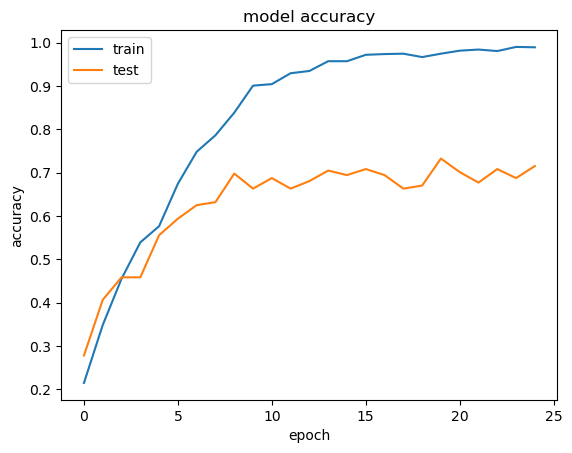

In [60]:
#Plot model accuracy over ephocs
plt.plot(cnn_results.history['accuracy'])
plt.plot(cnn_results.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [61]:
# Calculate pre-training accuracy 
score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=1)
accuracy = 100*score[1]

print("Pre-training accuracy: %.4f%%" % accuracy) 

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7088 - loss: 1.4575 
Pre-training accuracy: 71.5278%


In [62]:
# Evaluating the model on the training and testing set
score = CNN_model.evaluate(x_traincnn, y_train_lb, verbose=0)
print("Training Accuracy: ", score[1])

score = CNN_model.evaluate(x_testcnn, y_test_lb, verbose=0)
print("Testing Accuracy: ", score[1])

Training Accuracy:  1.0
Testing Accuracy:  0.7152777910232544


# Add Confusion Matrix

In [81]:
#Get predictions from model
# y_test_predictions = CNN_model.predict_classes(x_testcnn)
y_test_predictions = (CNN_model.predict(x_testcnn) > 0.5).astype("int32")
predict_y = CNN_model.predict(x_testcnn)
y_test_predictions = np.argmax(predict_y, axis = 1)
y_test_predictions

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 


array([6, 0, 4, 6, 3, 0, 4, 0, 1, 5, 7, 0, 7, 1, 1, 2, 0, 5, 4, 6, 6, 2,
       3, 7, 2, 2, 4, 4, 4, 7, 6, 1, 5, 7, 5, 1, 0, 4, 3, 3, 2, 5, 6, 7,
       6, 0, 7, 2, 4, 3, 6, 0, 3, 4, 6, 6, 1, 6, 6, 2, 0, 2, 6, 3, 2, 4,
       0, 6, 0, 0, 0, 4, 1, 1, 0, 3, 4, 6, 0, 6, 2, 3, 1, 2, 4, 1, 5, 6,
       7, 4, 1, 1, 0, 0, 1, 4, 6, 3, 1, 6, 3, 4, 4, 3, 6, 6, 7, 4, 1, 6,
       1, 3, 4, 6, 0, 1, 6, 0, 6, 7, 0, 2, 1, 4, 0, 7, 6, 0, 4, 2, 5, 6,
       5, 7, 7, 7, 0, 6, 7, 2, 3, 4, 7, 1, 0, 6, 2, 0, 4, 4, 0, 4, 4, 1,
       7, 3, 1, 0, 3, 5, 2, 3, 6, 7, 6, 1, 6, 0, 2, 7, 0, 4, 6, 2, 2, 6,
       2, 2, 0, 1, 7, 5, 6, 3, 7, 3, 0, 1, 1, 4, 3, 1, 1, 6, 2, 6, 3, 5,
       1, 6, 4, 7, 0, 3, 2, 2, 3, 7, 6, 3, 1, 6, 3, 7, 0, 3, 7, 5, 0, 6,
       2, 1, 7, 4, 3, 1, 4, 2, 6, 5, 3, 3, 4, 1, 6, 6, 2, 4, 1, 3, 6, 2,
       5, 4, 4, 4, 1, 4, 7, 0, 1, 6, 1, 7, 3, 2, 1, 0, 7, 1, 2, 2, 4, 6,
       4, 4, 1, 4, 3, 1, 4, 0, 4, 0, 7, 0, 1, 6, 1, 1, 2, 2, 1, 1, 0, 6,
       6, 7], dtype=int64)

In [82]:
y_test

1188          sad
330         angry
757         happy
53            sad
833          fear
          ...    
131          calm
791         angry
746           sad
857         happy
215     surprised
Name: emotion, Length: 288, dtype: object

In [83]:
#Get labels for emotions
y_labels_encoded

(0, 1, 2, 3, 4, 5, 6, 7)

In [84]:
# Change predictions to emotions in order to compare
y_test_predictions_labels =[]

#Go through each prediction and append to new list
for e in range(len(y_test_predictions)):
    y_test_predictions_labels.append(y_labels_encoded[y_test_predictions[e]])
    
#Build array of predictions
y_test_predictions_labels = np.array(y_test_predictions_labels)
y_test_predictions_labels

array([6, 0, 4, 6, 3, 0, 4, 0, 1, 5, 7, 0, 7, 1, 1, 2, 0, 5, 4, 6, 6, 2,
       3, 7, 2, 2, 4, 4, 4, 7, 6, 1, 5, 7, 5, 1, 0, 4, 3, 3, 2, 5, 6, 7,
       6, 0, 7, 2, 4, 3, 6, 0, 3, 4, 6, 6, 1, 6, 6, 2, 0, 2, 6, 3, 2, 4,
       0, 6, 0, 0, 0, 4, 1, 1, 0, 3, 4, 6, 0, 6, 2, 3, 1, 2, 4, 1, 5, 6,
       7, 4, 1, 1, 0, 0, 1, 4, 6, 3, 1, 6, 3, 4, 4, 3, 6, 6, 7, 4, 1, 6,
       1, 3, 4, 6, 0, 1, 6, 0, 6, 7, 0, 2, 1, 4, 0, 7, 6, 0, 4, 2, 5, 6,
       5, 7, 7, 7, 0, 6, 7, 2, 3, 4, 7, 1, 0, 6, 2, 0, 4, 4, 0, 4, 4, 1,
       7, 3, 1, 0, 3, 5, 2, 3, 6, 7, 6, 1, 6, 0, 2, 7, 0, 4, 6, 2, 2, 6,
       2, 2, 0, 1, 7, 5, 6, 3, 7, 3, 0, 1, 1, 4, 3, 1, 1, 6, 2, 6, 3, 5,
       1, 6, 4, 7, 0, 3, 2, 2, 3, 7, 6, 3, 1, 6, 3, 7, 0, 3, 7, 5, 0, 6,
       2, 1, 7, 4, 3, 1, 4, 2, 6, 5, 3, 3, 4, 1, 6, 6, 2, 4, 1, 3, 6, 2,
       5, 4, 4, 4, 1, 4, 7, 0, 1, 6, 1, 7, 3, 2, 1, 0, 7, 1, 2, 2, 4, 6,
       4, 4, 1, 4, 3, 1, 4, 0, 4, 0, 7, 0, 1, 6, 1, 1, 2, 2, 1, 1, 0, 6,
       6, 7])

In [ ]:
from sklearn.metrics import confusion_matrix

#Build confusion matrix and see results
confusion_matrix = confusion_matrix(y_test, y_test_predictions_labels)
confusion_matrix

In [ ]:
#See confusion matrix shape
confusion_matrix.shape

In [ ]:
#Turn al correct answers into 0 to visualize errors better
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
        if i == j:
            confusion_matrix[i,j] = 0

# See results
confusion_matrix

In [ ]:
#Add labels to confusion matrix
confusion_matrix = pd.DataFrame(confusion_matrix, columns=list(y_labels_encoded.values()), index=list(y_labels_encoded.values()))

print("The rows represents the true values or observations")
print("The columns respresent the model's predictions")

#Print confusion matrix results
confusion_matrix

In [ ]:
#Plot confusion matrix with results
ax = sns.heatmap(confusion_matrix, annot=True)

# Save CNN Model

In [ ]:
from keras.models import model_from_json
# serialize model to json
json_model = CNN_model.to_json()
#save the model architecture to JSON file
with open('capstone_project_emotion_detection_final_version.json', 'w') as json_file:
    json_file.write(json_model)
#saving the weights of the model
CNN_model.save_weights('capstone_project_emotion_detection_final_version.h5')
#Model loss and accuracy
print("Saved model to disk")

In [ ]:
# load json and create model
json_file = open('capstone_project_emotion_detection_final_version.json', 'r')
loaded_model_json = json_file.read()
json_file.close()
loaded_model = model_from_json(loaded_model_json)
# load weights into new model
loaded_model.load_weights("capstone_project_emotion_detection_final_version.h5")
print("Loaded model from disk")

In [ ]:
from keras.initializers import glorot_uniform
#Reading the model from JSON file
with open('capstone_project_emotion_detection_final_version.json', 'r') as json_file:
    json_savedModel= json_file.read()
#load the model architecture 
model_load = keras.models.model_from_json(json_savedModel)
model_load.summary()